In [4]:
import requests
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize
# Import libraries 
from matplotlib import pyplot as plt 
import numpy as np 
  

In [17]:
#importing map libraries

!conda install -c conda-forge folium=0.5.0 --yes
import folium 


Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    folium-0.5.0               |             py_0          45 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    ------------------------------------------------------------
                       

In [285]:
#For New York
LAT= 40.7128
LONG = -74.0060
NEAR='New York city'
INTENT='browse'
QUERY= 'gym'
RADIUS='100000'
CLIENT_ID = 'PJHVABWBETOR53I2N3GKF1XVZZANCEYSNY5HK2IZC2LNY1BB'
CLIENT_SECRET = 'EBQS51IU2NC0GVCQMQ0VO1ISQUPPRWV0WX2VZE4OM4LE54HB'
VERSION = '20200907'
LIMIT= 200
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&near={}&query={}&limit={}'.format(CLIENT_ID,CLIENT_SECRET,VERSION,NEAR,QUERY,LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=PJHVABWBETOR53I2N3GKF1XVZZANCEYSNY5HK2IZC2LNY1BB&client_secret=EBQS51IU2NC0GVCQMQ0VO1ISQUPPRWV0WX2VZE4OM4LE54HB&v=20200907&near=New York city&query=gym&limit=200'

In [287]:

results_ny = requests.get(url).json()
res_ny=results_ny['response']['groups'][0]['items']
res_ny

[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '49bd4e25f964a52067541fe3',
   'name': 'Equinox SoHo',
   'location': {'address': '69 Prince St',
    'crossStreet': 'at Crosby St',
    'lat': 40.72397271279325,
    'lng': -73.9970421147778,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.72397271279325,
      'lng': -73.9970421147778}],
    'postalCode': '10012',
    'cc': 'US',
    'city': 'New York',
    'state': 'NY',
    'country': 'United States',
    'formattedAddress': ['69 Prince St (at Crosby St)',
     'New York, NY 10012',
     'United States']},
   'categories': [{'id': '4bf58dd8d48988d176941735',
     'name': 'Gym',
     'pluralName': 'Gyms',
     'shortName': 'Gym',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_',
      'suffix': '.png'},
     'primary': True}],
   'photos': {'count': 0, 'groups': []}},
  'referra

In [12]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
    


In [80]:
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

In [289]:
dffinal = json_normalize(res_ny)
# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dffinal.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered = dffinal.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

dataframe_filtered_ny=dataframe_filtered
dataframe_filtered_ny

,name,categories,address,cc,city,country,crossStreet,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Equinox SoHo,Gym,69 Prince St,US,New York,United States,at Crosby St,"[69 Prince St (at Crosby St), New York, NY 100...","[{'label': 'display', 'lat': 40.72397271279325...",40.723973,-73.997042,NaN,10012,NY,49bd4e25f964a52067541fe3
1,Mercedes Club,Gym / Fitness Center,550 W 54th St,US,New York,United States,NaN,"[550 W 54th St, New York, NY 10019, United Sta...","[{'label': 'display', 'lat': 40.76759458807264...",40.767595,-73.992070,NaN,10019,NY,4ff23228e4b099c410f77195
2,Chelsea Piers Fitness,Gym / Fitness Center,60 Chelsea Piers,US,New York,United States,at W 20th St,"[60 Chelsea Piers (at W 20th St), New York, NY...","[{'label': 'display', 'lat': 40.7466449, 'lng'...",40.746645,-74.010057,NaN,10011,NY,4a72e5fef964a52050db1fe3
3,Equinox,Gym,45 Rockefeller Plaza,US,New York,United States,btwn W 49th & W 50th St,[45 Rockefeller Plaza (btwn W 49th & W 50th St...,"[{'label': 'display', 'lat': 40.75918, 'lng': ...",40.759180,-73.977784,NaN,10111,NY,4a705a19f964a5204ed71fe3
4,TMPL,Gym,355 W 49th St,US,New York,United States,8th Avenue,"[355 W 49th St (8th Avenue), New York, NY 1001...","[{'label': 'display', 'lat': 40.76254972590843...",40.762550,-73.988177,NaN,10019,NY,566dd692498eadbfb75805ef
5,Equinox Wall Street,Gym,14 Wall St,US,New York,United States,at Nassau St,"[14 Wall St (at Nassau St), New York, NY 10005...","[{'label': 'display', 'lat': 40.70727326752029...",40.707273,-74.010543,NaN,10005,NY,4a2f3322f964a520b6981fe3
6,Mendez Boxing,Gym / Fitness Center,25 E 26th St,US,New York,United States,btwn 5th & Madison Ave,"[25 E 26th St (btwn 5th & Madison Ave), New Yo...","[{'label': 'display', 'lat': 40.743068, 'lng':...",40.743068,-73.987074,NaN,10010,NY,4bb4ac3b2ba29c745715ef2d
7,Equinox Printing House,Gym,421 Hudson St,US,New York,United States,btwn Clarkson & Leroy St,"[421 Hudson St (btwn Clarkson & Leroy St), New...","[{'label': 'display', 'lat': 40.72997832429907...",40.729978,-74.007125,NaN,10014,NY,4d0a945ef2c1236a74ccfc56
8,Equinox Greenwich Avenue,Gym,97 Greenwich Ave,US,New York,United States,NaN,"[97 Greenwich Ave, New York, NY 10014, United ...","[{'label': 'display', 'lat': 40.73756890683277...",40.737569,-74.001777,West Village,10014,NY,49c9439bf964a5204e581fe3
9,Equinox Columbus Circle,Gym / Fitness Center,10 Columbus Cir,US,New York,United States,btwn W 58th & W 60th St,"[10 Columbus Cir (btwn W 58th & W 60th St), Ne...","[{'label': 'display', 'lat': 40.76874192651226...",40.768742,-73.982146,NaN,10019,NY,49fce426f964a520ed6e1fe3


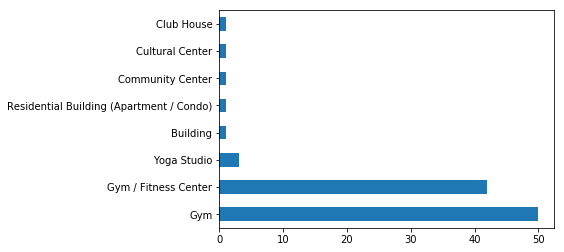

In [324]:
#bar diagram to see the multiple categories
data_count= dataframe_filtered_ny['categories'].value_counts()[:20]

data_count.plot(kind='barh')


In [291]:
venues_map = folium.Map(location=[LAT, LONG], zoom_start=13) # generate map centred around the the location postal code I picked

# add a red circle marker to represent the NYC Neighborhood
folium.features.CircleMarker(
    [LAT, LONG],
    radius=10,
    color='red',
    popup='New York City',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add all the gyms as purple circle markers
for lat, lng, label in zip(dataframe_filtered_ny.lat, dataframe_filtered_ny.lng, dataframe_filtered_ny.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='black',
        popup=label,
        fill = True,
        fill_color='black',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

In [2]:
#For San Francisco


LATITUDE= 34.0522
LONGITUDE= -118.2437
INTENT='checkin'
QUERY= 'gym'
RADIUS='100000'
CLIENT_ID = 'PJHVABWBETOR53I2N3GKF1XVZZANCEYSNY5HK2IZC2LNY1BB'
CLIENT_SECRET = 'EBQS51IU2NC0GVCQMQ0VO1ISQUPPRWV0WX2VZE4OM4LE54HB'
VERSION = '20200427'
LIMIT = 120
url_la = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&query={}&limit={}'.format(CLIENT_ID,CLIENT_SECRET,VERSION,LATITUDE,LONGITUDE,QUERY,LIMIT)
url_la




'https://api.foursquare.com/v2/venues/explore?client_id=PJHVABWBETOR53I2N3GKF1XVZZANCEYSNY5HK2IZC2LNY1BB&client_secret=EBQS51IU2NC0GVCQMQ0VO1ISQUPPRWV0WX2VZE4OM4LE54HB&v=20200427&ll=34.0522,-118.2437&query=gym&limit=120'

In [5]:
# fetching the results from GET method of Foursquare API
results_la = requests.get(url_la).json()
results_la


{'meta': {'code': 200, 'requestId': '5f585d333cb9a6614affe8fc'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'suggestedRadius': 781,
  'headerLocation': 'Historic Downtown',
  'headerFullLocation': 'Historic Downtown, Los Angeles',
  'headerLocationGranularity': 'neighborhood',
  'query': 'gym',
  'totalResults': 143,
  'suggestedBounds': {'ne': {'lat': 34.063037004165466,
    'lng': -118.23012016415595},
   'sw': {'lat': 34.040462597203145, 'lng': -118.26236023306848}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c28b6eafe6e2d7fb3a3533c',
       'name': 'CrossFit Mean Streets',
       'location': {'crossStreet': '3rd',
        'lat': 34.04992561098809,
        'lng': -118.24573266427912,
  

In [6]:
res_la=results_la['response']['groups'][0]['items']
res_la

[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '4c28b6eafe6e2d7fb3a3533c',
   'name': 'CrossFit Mean Streets',
   'location': {'crossStreet': '3rd',
    'lat': 34.04992561098809,
    'lng': -118.24573266427912,
    'labeledLatLngs': [{'label': 'display',
      'lat': 34.04992561098809,
      'lng': -118.24573266427912}],
    'distance': 315,
    'postalCode': '90012',
    'cc': 'US',
    'city': 'Los Angeles',
    'state': 'CA',
    'country': 'United States',
    'formattedAddress': ['265 S Main St (3rd)',
     'Los Angeles, CA 90012',
     'United States']},
   'categories': [{'id': '4bf58dd8d48988d175941735',
     'name': 'Gym / Fitness Center',
     'pluralName': 'Gyms or Fitness Centers',
     'shortName': 'Gym / Fitness',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_',
      'suffix': '.png'},
     'primary': True}],
   'photos': {

In [13]:
dffinal = json_normalize(res_la)
# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dffinal.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered = dffinal.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

dataframe_filtered_la=dataframe_filtered
dataframe_filtered_la

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,CrossFit Mean Streets,Gym / Fitness Center,NaN,US,Los Angeles,United States,3rd,315,"[265 S Main St (3rd), Los Angeles, CA 90012, U...","[{'label': 'display', 'lat': 34.04992561098809...",34.049926,-118.245733,NaN,90012,CA,4c28b6eafe6e2d7fb3a3533c
1,The Main Barre,Gym,NaN,US,Los Angeles,United States,NaN,950,"[Los Angeles, CA 90014, United States]","[{'label': 'display', 'lat': 34.04537616076394...",34.045376,-118.249887,NaN,90014,CA,4ed134119adf254457df8211
2,Los Angeles Athletic Club,Gym,431 W 7th St,US,Los Angeles,United States,at Olive St.,1244,"[431 W 7th St (at Olive St.), Los Angeles, CA ...","[{'label': 'display', 'lat': 34.04650829642701...",34.046508,-118.255316,NaN,90014,CA,4a0f961df964a52077761fe3
3,Equinox Downtown LA,Gym,444 S Flower St,US,Los Angeles,United States,at W 5th St,1071,"[444 S Flower St (at W 5th St), Los Angeles, C...","[{'label': 'display', 'lat': 34.051334, 'lng':...",34.051334,-118.255271,NaN,90071,CA,50cf99a2e4b095b993c1b899
4,UEvolution,Gym / Fitness Center,621 S Spring St,US,Los Angeles,United States,6th Street,1045,"[621 S Spring St (6th Street), Los Angeles, CA...","[{'label': 'display', 'lat': 34.04542920328262...",34.045429,-118.251548,NaN,90014,CA,51e955855019950326a7f7b5
5,Bikram Yoga Downtown LA,Yoga Studio,700 W 1st St,US,Los Angeles,United States,at Hope St,738,"[700 W 1st St (at Hope St), Los Angeles, CA 90...","[{'label': 'display', 'lat': 34.05597374706711...",34.055974,-118.250287,NaN,90012,CA,4b48a660f964a5209a5126e3
6,Ketchum Downtown YMCA,Gym,401 S Hope St,US,Los Angeles,United States,NaN,948,"[401 S Hope St, Los Angeles, CA 90071, United ...","[{'label': 'display', 'lat': 34.05207008603738...",34.052070,-118.253978,NaN,90071,CA,4a42a38ef964a52013a61fe3
7,Sheraton Grand Los Angeles Fitness Center,Gym / Fitness Center,711 S Hope St,US,Los Angeles,United States,NaN,1426,"[711 S Hope St, Los Angeles, CA 90017, United ...","[{'label': 'display', 'lat': 34.04782050427391...",34.047821,-118.258232,NaN,90017,CA,5907d3cfc824ae1461cf8fba
8,WestinWORKOUT,Gym,Westin Bonaventure,US,Los Angeles,United States,"Green Tower, 3rd Floor",1151,"[Westin Bonaventure (Green Tower, 3rd Floor), ...","[{'label': 'display', 'lat': 34.05307512367909...",34.053075,-118.256140,NaN,NaN,CA,4cc91668d063a143f7b40bb4
9,Orsini II Fitness Center,Gym / Fitness Center,550 N Figueroa St,US,Los Angeles,United States,NaN,1041,"[550 N Figueroa St, Los Angeles, CA 90012, Uni...","[{'label': 'display', 'lat': 34.06119726806503...",34.061197,-118.246791,NaN,90012,CA,4c89b1a79ef0224bc6bf547b


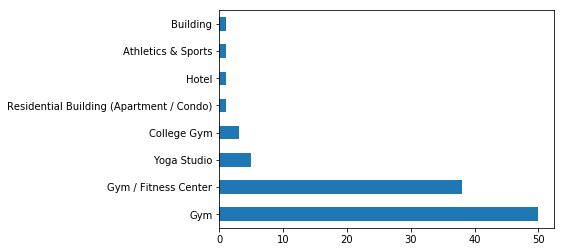

In [14]:

data_count= dataframe_filtered_la['categories'].value_counts()[:20]

data_count.plot(kind='barh')



In [18]:
venues_map = folium.Map(location=[LATITUDE, LONGITUDE], zoom_start=13) # generate map centred around the the location postal code I picked

# add a red circle marker to represent the LA Neighborhood
folium.features.CircleMarker(
    [LATITUDE, LONGITUDE],
    radius=10,
    color='red',
    popup='Los Angeles',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add all the gyms as purple circle markers
for lat, lng, label in zip(dataframe_filtered_la.lat, dataframe_filtered_la.lng, dataframe_filtered_la.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='purple',
        popup=label,
        fill = True,
        fill_color='purple',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map